# PHYS 105A:  Introduction to Scientific Computing

## Root Finding

## Problem Definition

* When we hear about "root finding", one may immediately think about computing the square root of a number, e.g., $\sqrt{2} = 1.414$.

* However, it actually includes a larger group of problems.  For any equation LHS = RHS, we can perform a trivial manipulation and move all terms to one side so that

  $f(x) = 0$
  
* The solutions to the above equation are its roots.  Solving the above equation is called root finding.

* The square root problem above can be casted into the solution of the equaiton $x^2 - 2 = 0$.

## Graphical Search for Roots

* It is always a good idea to plot a function.

* We already know how to plot functions in python

* Here, we make things a bit more fun by enabling controls to the plot.

In [1]:
%matplotlib notebook

from ipywidgets import *

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * x - 2

x = np.linspace(0, 2, 2001)
fig, ax = plt.subplots(1,1)

ax.plot(x, f(x))
ax.axhline(y=0, color='k', lw=0.5)

def update(a=0, b=2, y=2):
    ax.set_xlim( a, b)
    ax.set_ylim(-y, y)
    fig.canvas.draw_idle()

interact(
    update,
    a = (0, 2, 0.001),
    b = (0, 2, 0.001),
    y = (0, 2, 0.001));

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, step=0.001), FloatSlider(value=2.0, des…

* By playing around with the above widgets, we can already find out $1.40 < \sqrt{2} < 1.42$

* This doesn't require programming a special square root function.  Instead, it simply require evulating the polynomial $x^2 - 2$.

* When we change the domain/x-limit/interval of the plot, we are able to identify the location of the root.

* This is exactly the idea we will use to find roots numerically.

## Bisection Method

* There are many methods can be used to solve the root(s) once we have the bracket.

* They have different speed and complexity.  One of the simplest but the most robust method is the "bisection method".

* The idea is very simple:

  * Evaluate the function at a valid interval's midpoint and examine its sign.
  
  * Use the midpoint to replace the limit which has the same sign.
  
  * Therefore, the interval containing the root decrease by a factor of two after each iteration.

* If after $n$ iterations the root is known to be within an interval of size $\epsilon_n$, then after the next iteration it will be bracketed within an interval of size:

  $\epsilon_{n+1} = \epsilon_n / 2$
  
  neither more nor less.
  
* Thus, we know in advance the number of iterations required to achieve a given tolerance in the solution,

  $n = \log_2 \frac{\epsilon_0}{\epsilon}$
  
  where $\epsilon_0$ is the size of the initially bracketing interval and $\epsilon$ is the desired ending tolerance.
  
* Bisection must succeed.

  * If the interval happens to contain more than one root, bisection will find one of them.
  
  * If the interval contains no roots and merely straddles a singularity, it will converge on the singularity.

In [2]:
def bisection(f, a, b, acc=1e-12, nmax=100): # function f as an input variable
    if a > b:
        raise ValueError('Bad initial range')    
    
    l = f(a)
    r = f(b)
    if l * r > 0:
        raise ValueError("Root must be bracketed for bisection")
    
    for _ in range(nmax):
        m = (a + b) / 2
        c = f(m)
        
        if (b - a < acc) or (c == 0): # DONE!
            return m
        
        if l * c < 0: # there is at least one root on the left
            b = m
        else:
            a = m
            
    raise Exception("Too many iterations")

In [3]:
print(bisection(f,0,2))

1.414213562372879


In [4]:
# Let's test it

from math import sqrt

sqrt2 = bisection(f, 0, 2)

print('sqrt(2) by bisection:', sqrt2)
print('absolute error:', sqrt(2) - sqrt2)

sqrt2 = bisection(f, 0, 2, acc=1e-15)

print('sqrt(2) by bisection:', sqrt2)
print('absolute error:', sqrt(2) - sqrt2)

sqrt(2) by bisection: 1.414213562372879
absolute error: 2.1604940059205546e-13
sqrt(2) by bisection: 1.4142135623730954
absolute error: -2.220446049250313e-16


## Applications

* This is AWESOME because we can now solve some problem that even the greatest mathematicians cannot solve!

* We all know that for a polynomail of order $n$, there is at most $n$ real roots.  For example,

  * $b x + a \in P_1$ has exactly 1 root.
  
  * $c x^2 + b x + a \in P_2$ has at most 2 roots.
  
  * $d x^3 + c x^2 + b x + a \in P_3$ has at most 3 roots.
  
* For $n = 2$, we can solve the roots by applying the quadrtic equation:

  $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $
  
* For $n = 3$ and 4, there are analytical solution methods, although their forms are much more complicated (see [here](https://en.wikipedia.org/wiki/Cubic_equation#General_cubic_formula) and [here](https://en.wikipedia.org/wiki/Quartic_function#General_formula_for_roots)).

* For $n = 5$, the [Abel–Ruffini theorem](https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem) states that there is no general solution (in radicals).

* But with a numerical root finder, we are able to solve for the roots of abritry polynomials.

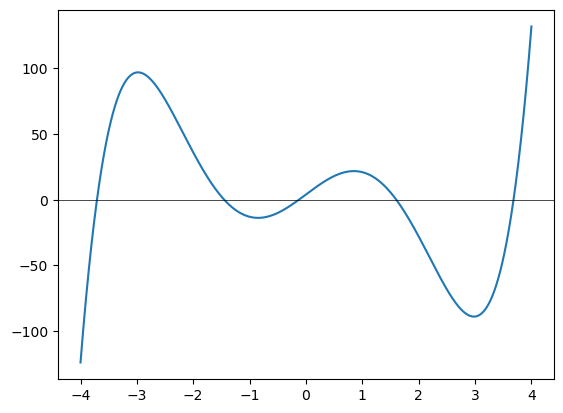

In [5]:
# We will try to solve the roots of a quintic function (5th order polynomial)

%matplotlib inline

def h(x):
    return x**5 - 16*x**3 + 32*x + 4

x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.axhline(y=0, color='k', lw=0.5)

In [6]:
# By eyes, we can come up with five brackets

brackets = [
    (-5, -3),
    (-3, -1),
    (-1,  1),
    ( 1,  3),
    ( 3,  5),
]

roots = np.array([bisection(h, *b) for b in brackets])
print(roots)

[-3.70828875 -1.45067744 -0.12599918  1.60257301  3.68239236]


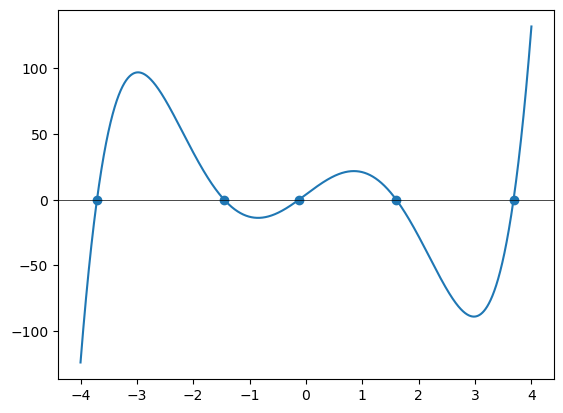

In [7]:
plt.plot(x, h(x))
plt.axhline(y=0, color='k', lw=0.5)
plt.scatter(roots, h(roots))

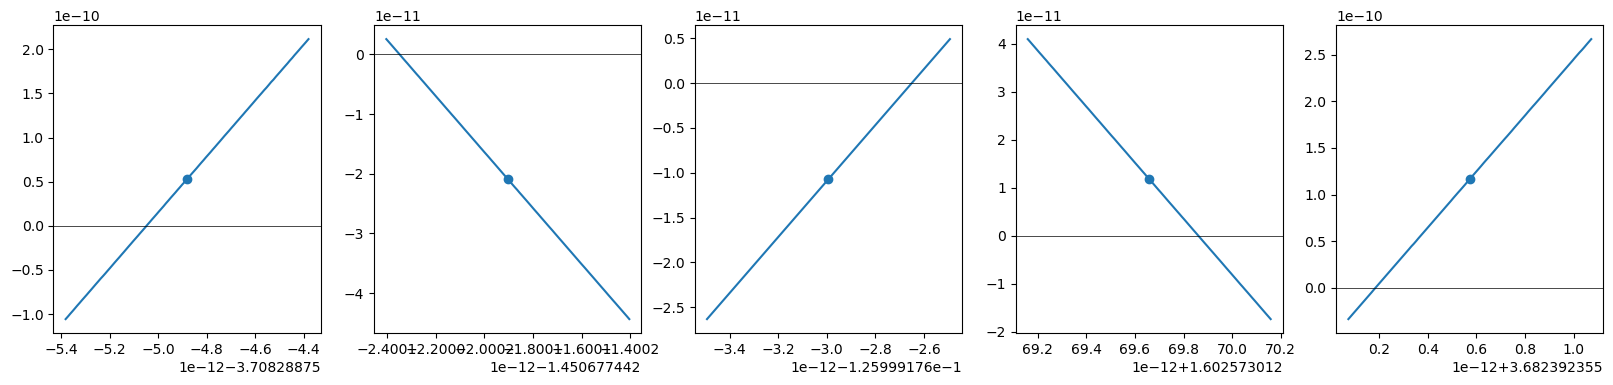

In [8]:
fig, axes = plt.subplots(1,5, figsize=(20,4))

delta = 1e-12

for i, root in enumerate(roots):
    x = np.linspace(root-delta/2, root+delta/2, 105)
    axes[i].plot(x, h(x))
    axes[i].scatter([root], [h(root)])
    axes[i].axhline(y=0, color='k', lw=0.5)

## Summary

* Root finding is a simple mathematical without generic solution.

* Numerical root finders can help us solve for roots for functions that are arbitrarily complicated.

* The bisection method is extremely simple but powerful!